### In this section, we show examples of how to use ``gsCR`` to build the Ensemble mean field subject to desired constraints.

Remind that the Ensemble mean field is built with 
$\bar{f}(\mathbf x) = <f(\mathbf x)|\Gamma> = \xi_i(\mathbf x) \xi^{-1}_{ij} c_j$:

In [1]:
%pylab inline

from gaussianCR.construct import *
from gaussianCR.cosmo import *
from gaussianCR.transform import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
# some style of the notebook
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15) 
np.set_printoptions(precision=3,linewidth=150,suppress=True)

---


**initialize cosmology**

In [3]:
import nbodykit.cosmology as nbcosmos 
wmap9 = Cosmos(FLRW=True,obj=nbcosmos.WMAP9)

---


**initialize gsCR object**

Here we use wmap9 cosmology, set the box size to be 20 Mpc/$h$, Gaussian kernel length $R_G = 0.9$ Mpc/$h$, density field in shape of (128,128,128)

In [4]:
fg = gsCR(wmap9,Lbox=20,Nmesh=128,RG=0.9)

In [5]:
print (fg)

  This is a gsCR object: 
  Lbox = 20.0 Mpc/h 
  Nmesh = 128
  RG = 0.9 Mpc/h 
  Sigma0_RG = 1.82, Sigma2_RG = 1.78 
  xpk = [0, 0, 0] 
  CONS = ['full'] 
  xij_tensor_inv = 
 None 


---


**Example 1: Shape of the peak** 

We build an ensemble mean field of a density peak in the center of the box, with constraints only imposed on the immediate surrounding of the peak with CONS = ['f0', 'f2']

We set peak height $\nu = 4\sigma_0(R_G)$, compactness $x_d = 3\sigma_2(R_G)$, axial ratio $(a_1/a_2)^2 = 2$, and $\alpha_1 = \beta_1 = \phi_1 = 0$ so that $a_1$ aligns along $x$ axis.

In [6]:
fg.xpk = [10,10,10]
fg.CONS = ['f0','f2']
fg.build_Xij_inv_matrix() # this need to be call whenever CONS is changed, to construct the covariance matrix

c_values = fg.set_c_values(nu=4,xd=3,a12sq=2) # set constraint values
dx_ensemble = fg.Ensemble_field(c_values)

Constrain peak parameters: 
f0:  nu = 4.0 $\sigma_0$
f2:  xd = 3.0 $\sigma_2$, a12sq = 2.0, a13sq = 1.0,a1=0.00, b1=0.00, p1=0.00


We visualization of the ensemble mean field by projecting it to the xy plane

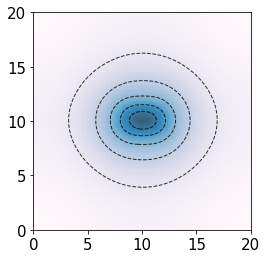

In [7]:
den_field = np.transpose(np.sum(dx_ensemble,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))

We can quickly move the peak to the corner by directly updating xpk:

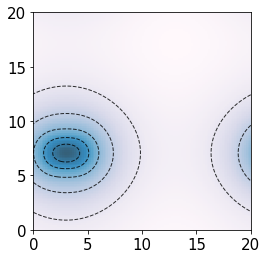

In [8]:
fg.xpk = [3,7,10]
dx_ensemble = fg.Ensemble_field(c_values)

den_field = np.transpose(np.sum(dx_ensemble,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))

We can make the peak more elliptical by setting axial ratio $(a_1/a_2)^2 = 3$, orienate the peak along (+1,+1,0) direction by setting $\alpha_1 = 0.25 \pi$.

Constrain peak parameters: 
f0:  nu = 4.0 $\sigma_0$
f2:  xd = 3.0 $\sigma_2$, a12sq = 3.0, a13sq = 1.0,a1=0.79, b1=0.00, p1=0.00


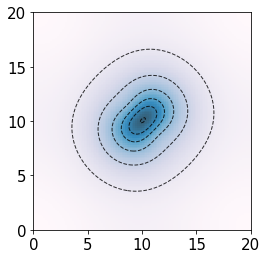

In [9]:
fg.xpk = [10,10,10]
c_values = fg.set_c_values(nu=4,xd=3,a12sq=3,a1=0.25*np.pi) # set constraint values
dx_ensemble = fg.Ensemble_field(c_values)

den_field = np.transpose(np.sum(dx_ensemble,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))

---
The $\alpha_1$, $\beta_1$, $\phi_1$ are the Euler angles that sets the rotational transformation of the principal axes of the mass ellipsoid. The rotational matrix is in ZX'Z'' sequence, see https://mathworld.wolfram.com/EulerAngles.html

We can also know the direction of the peak by looking at ``gaussianCR.transform.set_Aij(a1,b1,p1)``

e.g. in the above example, run set_Aij(a=0.25*np.pi,b=0,p=0):

    array([[ 0.707,  0.707,  0.   ],  <--- direction of a1
           [-0.707,  0.707,  0.   ],  <--- direction of a2
           [ 0.   , -0.   ,  1.   ]]) <--- direction of a3

---



**Example 2: peculiar velocity of the peak**

Ensemble mean field of a density peak with peculiar velocity on scale of $R_G$.

Here we set peak height $\nu = 3\sigma_0(R_G)$, and peculiar velocity $v_{G,x} = 60$ km/s in $+x$ direction.

Constrain peak parameters: 
f0:  nu = 3.0 $\sigma_0$
vx = 60.0 km/s


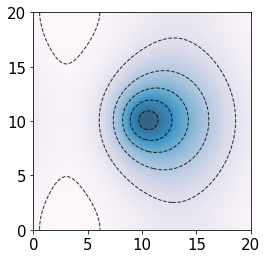

In [10]:
fg.xpk=np.array([10,10,10])
fg.CONS = ['f0','vx']
fg.build_Xij_inv_matrix()
c_values = fg.set_c_values(nu=3,vx=60)

dx_ensemble = fg.Ensemble_field(c_values)
den_field = np.transpose(np.sum(dx_ensemble,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))

Note that the peculiar velocity of the peak is induced by the overdensity of matter distribution to the right of the peak, therefore in positive $x$ direction.


We can set density peak has $v_{G,x} = v_{G,y} = 60$ km/s in both $x$ and $y$ direction:

Constrain peak parameters: 
f0:  nu = 3.0 $\sigma_0$
vx = 60.0 km/s
vy = 60.0 km/s


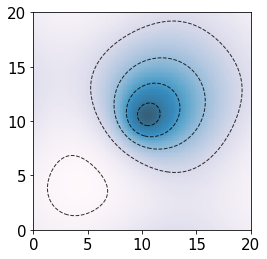

In [11]:
fg.xpk=np.array([10,10,10])
fg.CONS = ['f0','vx','vy']
fg.build_Xij_inv_matrix()
c_values = fg.set_c_values(nu=3,vx=60,vy=60)

dx_ensemble = fg.Ensemble_field(c_values)
den_field = np.transpose(np.sum(dx_ensemble,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))

---




**Example 3: Tidal field around the peak**


Ensemble mean field of a density peak with subject to the tidal field.
Here we set peak height $\nu = 4\sigma_0(R_G)$, with shear magnitude $\epsilon=60$, shear angle $\omega = 1.5\pi$, such that tidal field is (+30, -30, 0) km/s/Mpc in the three principal axes.
We set the orientation of the tidal field $\alpha_2 = \pi$, $\beta_2 = 0$, $\phi = 0.5 \pi$ (default setting), such that the peak is elongated in $x$ direction and compressed in $y$ direction.

Constrain peak parameters: 
f0:  nu = 4.0 $\sigma_0$
TG:  epsilon = 60.0 km/s/Mpc, omega = 4.71, a2=3.14, b2=0.00, p2=1.57


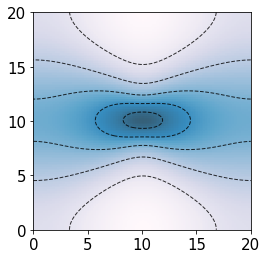

In [12]:
fg.xpk=np.array([10,10,10])
fg.CONS = ['f0','TG']
fg.build_Xij_inv_matrix()
c_values = fg.set_c_values(nu=4,epsilon=60,omega=1.5*np.pi)

dx_ensemble = fg.Ensemble_field(c_values)
den_field = np.transpose(np.sum(dx_ensemble,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5,extent=(0,fg.attrs['Lbox'],0,fg.attrs['Lbox']))

---
We can set the direction of the tidal field by looking at ``gaussianCR.transform.set_Aij(a2,b2,p2)``

e.g. in the above example, run set_Aij(a=np.pi,b=0,p=0.5*np.pi):

    array([[-0., -1.,  0.],   <--- direction of smallest (negative) eigenvalue of Tij, compression
           [ 1., -0.,  0.],   <--- direction of largest (positive) eigenvalue of Tij, elongation
           [ 0.,  0.,  1.]])